# Project Template: Phase 3

Below are some concrete steps that you can take while doing your analysis for phase 3. This guide isn't "one size fit all" so you will probably not do everything listed. But it still serves as a good "pipeline" for how to do data analysis.

If you do engage in a step, you should clearly mention it in the notebook.

---


In [1]:
import pandas as pd
data = pd.read_csv('df2.csv')
print(data)

         Unnamed: 0  Unnamed: 0.1  Severity  Start_Time  End_Time  Start_Lat  \
0                 0             0         3           0         6  40.108910   
1                 1             1         2           5        11  39.865420   
2                 2             2         2           6        12  39.102660   
3                 3             3         2           6        12  39.101480   
4                 4             4         2           6        12  41.062130   
5                 5             5         3           7        13  39.172393   
6                 6             6         2           8        14  39.063240   
7                 7             7         2           8        14  39.067080   
8                 8             8         2           8        14  39.775650   
9                 9             9         2          11        17  41.375310   
10               10            10         2          14        20  40.702247   
11               11            11       

## 3.0) Evaluation

Now that you have selected your models and have trained/tuned them, it's time to see how they stack up. Some important questsion to ask:

1. How did your models compare to each other
2. In what metrics do they differ, why?

## 3.1) Comparing Models

To compare your models, you can try things such as:

1. Doing multiple random restarts of training/test splits (code below)
2. Using cross-validation

In your report, report back the following metrics:

**Classification**
* Accuracy
* Precision
* Recall
* F1
* AUC

**Regression**
* MSE
* MAE
* $R^2$

**Sample Evaluation Code**: Here is some sample code for the evaluation procedure. **You do not need to use the sample code if you feel that it wouldn't work with your pipeline, but you can use it as inspiration**. It runs a set number of trials using different splits, and returns back a dataframe, where each row represents a single random evaluation. It has 3 columns.
    
Model: The name of the model being evaluated

Evaluation: The name of the evaluation (e.g. acc, precision, MSE)

Score: The score of the evaluation

In [27]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

import numpy as np
"""
Evaluates a classification model
"""
def evaluate_classification(model,x_test_ev,y_test_ev):
    predictions = model.predict(x_test_ev)
    
    acc = accuracy_score(y_test_ev,predictions)
    
    classification = classification_report(y_test_ev, predictions)
    

    
    # Depending on the type of classification you are doing (e.g. multiclass vs binary)
    # Make sure to change the "average" param depending on what you need
    prec = precision_score(y_test_ev,predictions,average="macro")
    recall = recall_score(y_test_ev,predictions,average="macro")
    f1 = f1_score(y_test_ev,predictions,average="macro")
    # Make sure to change/edit the `multi_class` of the ROC if you're doing multiclass
    
   
   
    

 
    
    return {"acc":acc,"precision":prec,"recall":recall,"f1":f1}


In [28]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

"""
Evaluates regression using MAE,MSE, and R^2
"""
def evaluate_regression(model,x_test_ev,y_test_ev):
    predictions = model.predict(x_test_ev)
    mae = mean_absolute_error(y_test_ev,predictions)
    mse = mean_squared_error(y_test_ev,predictions)
    r2 = r2_score(y_test_ev,predictions)
    return {"mae":mae,"mse":mse,"r2":r2}

In [29]:

    
    
def evaluate_random(model,X_train,y_train,X_test,y_test):
    model.fit(X_train,y_train)
    
    # Switch this out with `evaluate_regression` if you're doing a regression problem
    evals = evaluate_classification(model,X_test,y_test)
    #evals = evaluate_regression(model,X_test,y_test)
    
    return evals

In [30]:
from sklearn.model_selection import train_test_split
from dask.distributed import Client, LocalCluster
cluster = LocalCluster()
client = Client(cluster)
"""
Input:
    X: Your features
    y: Your target
    models: A list of the models that you are evaluating
    n_trials (opt): The number of random trials
    
Output:
    A dataframe with three colums and len(models)*n_trials*(number of evaluation metrics) rows.
    Each row represents a single random evaluation.
    
    Model: The name of the model being evaluated
    Evaluation: The name of the evaluation (e.g. acc, precision, MSE)
    Score: The score of the evaluation
"""
def get_scores(X,y,models,n_trials=1):
    
    data = {
        "model": [],
        "evaluation": [],
        "score": [],
        "classification": []
    }
    
    for n in range(n_trials):
        for model in models:
            # Put in special sampling methods
            
            X_train,X_test,y_train,y_test = train_test_split(X,y)
            # Put in feature scaling here
            # MinMaxScaler()
            
            scores = evaluate_random(model,X_train,y_train,X_test,y_test)
            classification = evaluate_classification(model,X_train,y_train)
            for key in scores:
                data["model"].append(str(model))
                data["evaluation"].append(key)
                data["score"].append(scores[key])
                data["classification"].append(classification[key])
    
    return pd.DataFrame.from_dict(data)

/home/aaronlinder/anaconda3/lib/python3.7/site-packages/distributed/bokeh/core.py:55: UserWarning: 
Port 8787 is already in use. 
Perhaps you already have a cluster running?
Hosting the diagnostics dashboard on a random port instead.
  warnings.warn('\n' + msg)


In [31]:
# Example of getting classification scores
# (See "Follow" doc for how to do it with regression)



import numpy as np
from sklearn.neighbors import KNeighborsClassifier
X,y = data.iloc[:,0:-1], data['Severity'].iloc[:]

neigh = KNeighborsClassifier(n_neighbors=3)

tips = client.compute(get_scores(X,y,[neigh],1))




### Print a boxplot of the different random runs (see Follow document)

                                               model evaluation     score  \
0  KNeighborsClassifier(algorithm='auto', leaf_si...        acc  0.821052   
1  KNeighborsClassifier(algorithm='auto', leaf_si...  precision  0.589474   
2  KNeighborsClassifier(algorithm='auto', leaf_si...     recall  0.537925   
3  KNeighborsClassifier(algorithm='auto', leaf_si...         f1  0.555230   

   classification  
0         0.89972  
1         0.80157  
2         0.73399  
3         0.76011  


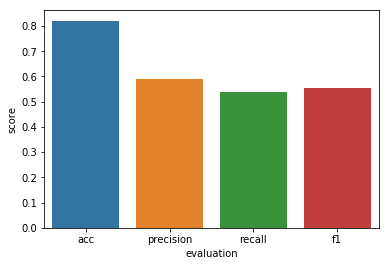

In [32]:
print(tips)
# import pandas
import pandas as pd
# import matplotlib
import matplotlib.pyplot as plt
# import seaborn
import seaborn as sns
%matplotlib inline



ax = sns.barplot(x="evaluation", y="score", data=tips)


### Create a table with the average evaluation scores of each metric for each model
**Bold** the best result for each.

Here's an example for a regression problem.

|     | LinReg | SVR   | MLP   |
|-----|--------|-------|-------|
| **MAE** | 3.061  | 4.143 | **2.71**  |
| **MSE** | 22.09  | 42.42 | **15.37** |
| **$R^2$** | 0.684  | 0.394 | **0.780** |

## 4.0) Technical Retrospective

Now that you have your final model, go back and look at how your decisions impacted the results. This can take many forms, here are some ideas:

* Which of your decisions were helpful? With your best model:
    * Compare the results of the model with an without your feature selection
    * Compare the results with and without feature engineering
    * Compare if your sampling method made a difference
    
    
* Why did your model do well?
    * If your model is interpretable, discuss feature importance (e.g. decision tree splits, coefficients of linear regression)

## 5.0) Writeup 

Now it is time to reflect upon your work and tie up your report. The goal of this project was to get you familiar with doing a data science problem from scratch on a custom dataset. First, write some conclusions about your model. Then, consider how it could be used in practice. Finally, write about your experiences and what you learned from this project.

Use the following questions as inspiration.

1. How could we use this model in practice?
2. Would you trust the model to make decisions?
3. What are the limitations of the model?
4. what are alternative approaches you could try in the future?